In [43]:
import seaborn as sns
import numpy as np
import pandas as pd


In [44]:
# system_a = np.array([0,1,1,1,1,1,0,0,0,0])
# system_b = np.array([1,1,1,0,0,0,0,0,1,1])
system_a = np.array([False, True, True, True, True, True, False, False, False, False])
system_b = np.array([True, True, True, False, False, False, False, False, True, True])
rank_discount = np.array(range(1,11))
num_relevant = 5

# Workout I

In [45]:
precision_a = np.cumsum(system_a)/rank_discount
precision_b = np.cumsum(system_b)/rank_discount

In [46]:
recall_a = np.cumsum(system_a)/num_relevant
recall_b = np.cumsum(system_b)/num_relevant

In [47]:
df_a = pd.DataFrame({'precision': precision_a, 'recall': recall_a, 'method':'A', 'rank': range(1,11)})
df_b = pd.DataFrame({'precision': precision_b, 'recall': recall_b, 'method': 'B', 'rank': range(1,11)})
# df_a
pd.concat([df_a ,df_b])

,precision,recall,method,rank
0,0.000000,0.0,A,1
1,0.500000,0.2,A,2
2,0.666667,0.4,A,3
3,0.750000,0.6,A,4
4,0.800000,0.8,A,5
5,0.833333,1.0,A,6
6,0.714286,1.0,A,7
7,0.625000,1.0,A,8
8,0.555556,1.0,A,9
9,0.500000,1.0,A,10


<Axes: xlabel='recall', ylabel='precision'>

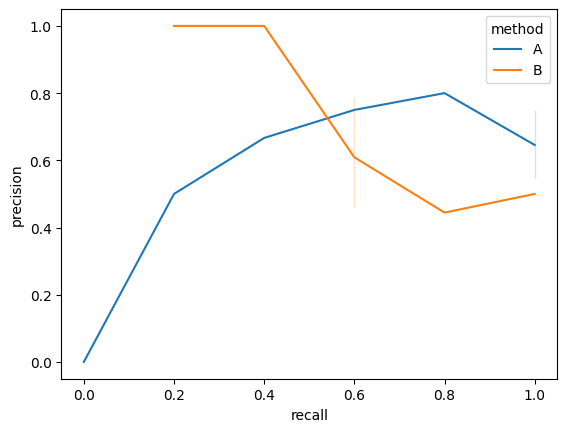

In [48]:
sns.lineplot(data=pd.concat([df_a, df_b]),hue="method", x="recall", y="precision")


<Axes: xlabel='rank', ylabel='precision'>

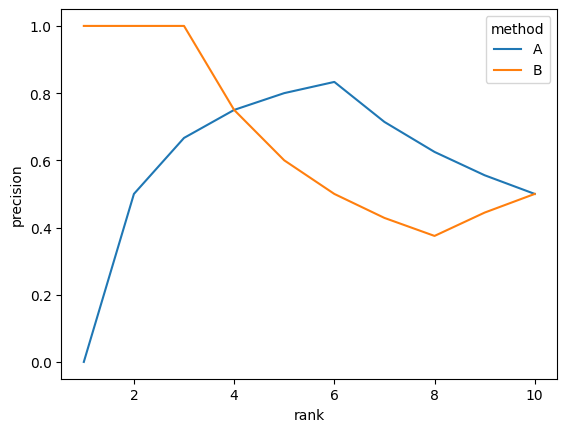

In [49]:
sns.lineplot(data=pd.concat([df_a, df_b]),hue="method", x="rank", y="precision")


# Workout II

In [50]:
ap_a = precision_a[system_a].mean()

In [51]:
ap_b = precision_b[system_b].mean()

In [52]:
from decimal import *
print(Decimal(ap_a), Decimal(ap_b))

0.71000000000000007549516567451064474880695343017578125 0.7888888888888889727724063050118274986743927001953125


# Workout III

In [53]:
# Given bug ranking orders
# bug_ranking_A = ["Minor", "Critical", "Critical", "Critical", "Critical", "Minor", "Critical", "Minor", "Minor", "Minor"]
# bug_ranking_B = ["Critical", "Critical", "Critical", "Minor", "Minor", "Minor", "Minor", "Critical", "Critical", "Minor"]

# Relevance scores mapping
# relevance_mapping = {"Critical": 3, "Major": 2, "Minor": 1}
ideal = [3,3,3,3,3]
report_a = [1, 3, 3, 3, 3, 1, 3, 1, 1, 1]
report_b = [3, 3, 3, 1, 1, 1, 1, 3, 3, 1]

DCG_ideal = 0
DCG_A = 0
DCG_B = 0

for num in range(1,5):
    division = np.log2(num+1)
    DCG_ideal += np.divide(ideal[num-1], division) 
    DCG_A +=  np.divide(report_a[num-1], division) 
    DCG_B +=  np.divide(report_b[num-1], division) 

DCG = {'ideal': DCG_ideal, 'A': DCG_A, 'B': DCG_B}
DCG

{'ideal': 7.684818934934552, 'A': 5.684818934934552, 'B': 6.823465818787765}

In [54]:
Decimal(DCG_A/DCG_ideal)

Decimal('0.7397466333385989134541205203277058899402618408203125')

In [55]:
Decimal(DCG_B/DCG_ideal)

Decimal('0.88791497581925493687293737821164540946483612060546875')